### Group:
- Nooshin Shojaee
- Francesco Ciraolo
- Lucas Souza Romao

### Enviroments Setup

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from keras.preprocessing.image import ImageDataGenerator
#from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Activation, BatchNormalization, GlobalAveragePooling2D
from keras import regularizers, optimizers
from keras.models import Sequential
import keras.layers as layers

from sklearn.model_selection import train_test_split

from PIL import Image
import imghdr
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

import pandas as pd
import numpy as np
import os
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint


from sklearn.model_selection import train_test_split

In [2]:
train_pics_dir = '/home/lucas/Documents/ML_FinalProject/train/train/'
test_pics_dir = '/home/lucas/Documents/ML_FinalProject/test/test/'

### Data Preprocessing

- First check if the image are the type 'gif', if yes remove from the DataFrame, train and test set gif type are less than 1% of the total, so the files are drop from the DataFrames

In [3]:
def filter_images(dataset):
    
     dataset = dataset.set_index('file_name')
     
     for file in dataset.index:
         if (imghdr.what(file) == 'gif'):
            dataset = dataset.drop(file)
             
     return dataset.reset_index()  

In [4]:
def add_labels_dataframe(dataset):
    
    df = dataset.copy()
    
    for column in df.loc[:, df.columns != 'file_name']:
        df[column]= df[column].replace(1,df[column].name)
    
    df['classes'] = df.loc[:, (df.columns != 'file_name')].values.tolist()
    df['classes']= df['classes'].apply(lambda x : list(filter(lambda b: b != 0, x)))
    
    return df['classes']

In [421]:
test_df = pd.read_csv('test/test.anno.txt', sep=" ")
labels = test_df.columns
file_names = test_df['file_name']
test_df['file_name'] = test_df['file_name'].apply(lambda x: os.path.join(test_pics_dir, x))
test_df.head()

,file_name,indoor,outdoor,person,day,night,water,road,vegetation,tree,mountains,beach,buildings,sky,sunny,partly_cloudy,overcast,animal
0,/home/lucas/Documents/ML_FinalProject/test/tes...,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1
1,/home/lucas/Documents/ML_FinalProject/test/tes...,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
2,/home/lucas/Documents/ML_FinalProject/test/tes...,0,1,1,0,0,0,1,1,1,1,0,0,1,0,0,1,0
3,/home/lucas/Documents/ML_FinalProject/test/tes...,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
4,/home/lucas/Documents/ML_FinalProject/test/tes...,0,1,0,0,0,1,0,0,0,0,1,1,1,0,1,0,0


In [1341]:
train_df = pd.read_csv('train/train.anno.txt', sep=" ", names=labels)
train_df['file_name'] = train_df['file_name'].apply(lambda x: os.path.join(train_pics_dir, x))
#train_df['classes'] = add_labels_dataframe(train_df)
train_df['classes'] = train_df.loc[:, (train_df.columns != 'file_name')].values.tolist()
# train_df.head()
columns = train_df.columns[0:18].tolist()

In [1353]:
train_df = filter_images(train_df)
#test_df = filter_images(test_df)
index = 0
train_size = len(train_df)
dic_classes = {}

for column in train_df:
    if train_df[column].name != 'file_name' and train_df[column].name != 'classes':
        dic_classes[train_df[column].name] = len(train_df[train_df[column] == 1])

In [1354]:
dic_classes

{'indoor': 429,
 'outdoor': 1492,
 'person': 1265,
 'day': 1472,
 'night': 452,
 'water': 529,
 'road': 342,
 'vegetation': 1031,
 'tree': 535,
 'mountains': 268,
 'beach': 78,
 'buildings': 914,
 'sky': 1260,
 'sunny': 231,
 'partly_cloudy': 427,
 'overcast': 367,
 'animal': 103}

In [1343]:
# dict_file = {}
# idx = 0
# for i in train_df['file_name']:
#     dict_file[idx] = i
#     train_df.loc[idx,'file_name'] = idx
#     idx += 1

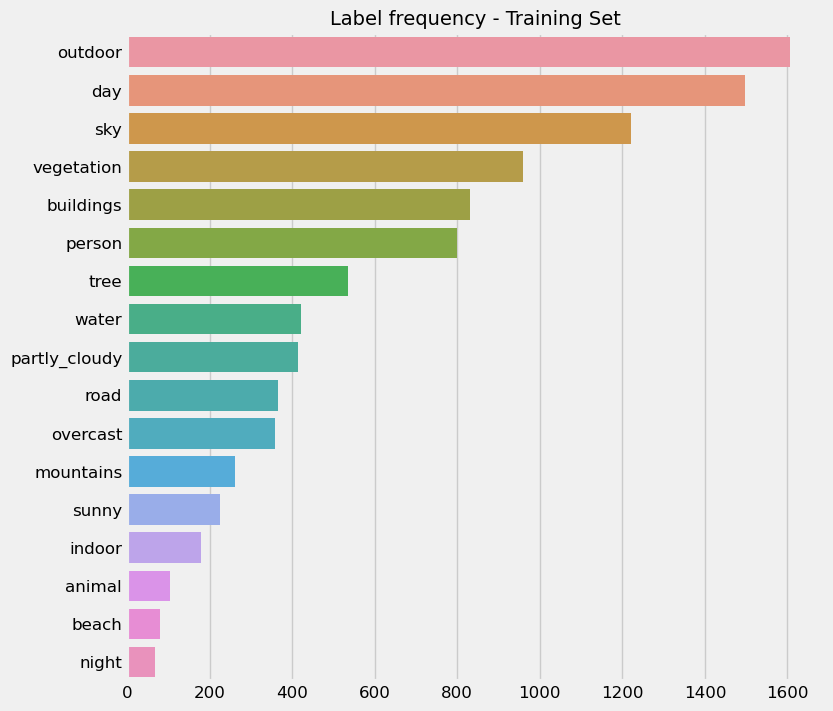

In [1344]:
plot()

<AxesSubplot:>

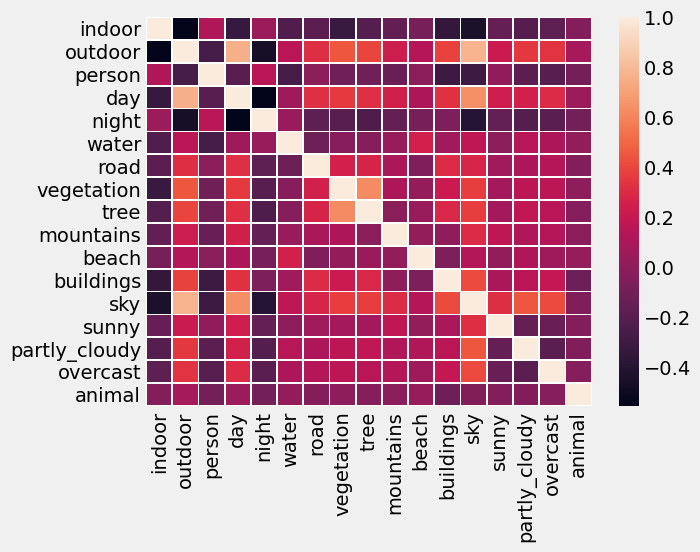

In [1355]:
corr = train_df.corr()
sns.heatmap(corr, linewidths=.5)

In [1360]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(sampling_strategy='auto')

cols = [col for col in train_df.columns if col not in ['night', 'classes', 'file_name']]
X = train_df[cols]
y = train_df['night']

X_res, y_res = smt.fit_resample(X, y)

In [1363]:
X_res

,indoor,outdoor,person,day,water,road,vegetation,tree,mountains,beach,buildings,sky,sunny,partly_cloudy,overcast,animal
0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0
1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0
2,0,1,1,1,0,0,0,0,0,0,1,1,1,0,0,0
3,0,1,1,1,0,1,1,0,1,0,0,1,1,0,0,0
4,0,1,1,1,0,1,1,0,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4131,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4132,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0
4133,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0
4134,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [1347]:
test = train_df[(train_df.outdoor == 0) & (train_df.day == 0) & (train_df.sky == 0) & (train_df.night == 1)]

for i in range(5):
    train_df = train_df.append(test) 

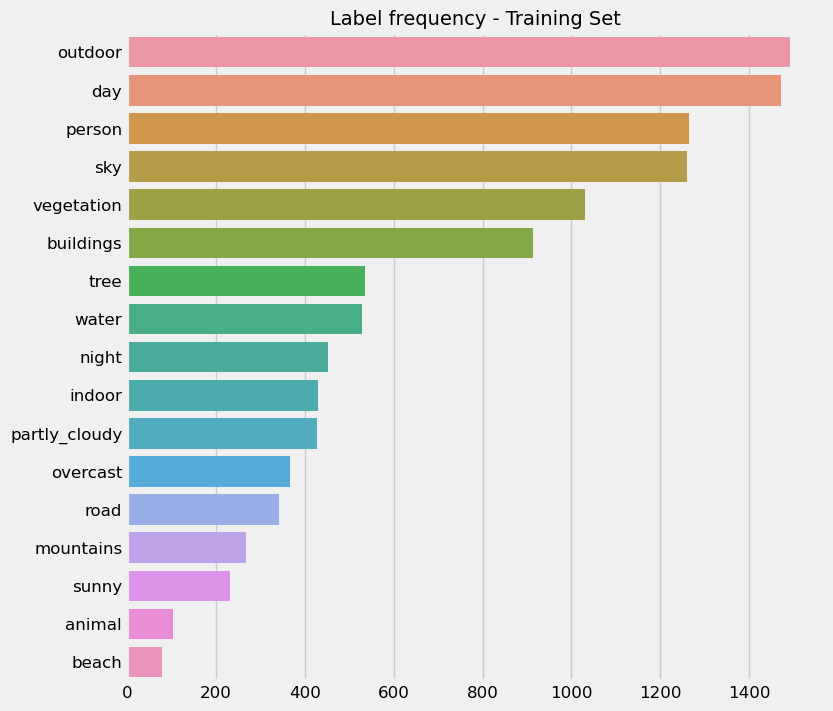

In [1350]:
plot()

In [1300]:
night = train_df[(train_df.night == 1) & (train_df.outdoor ==0) & (train_df.sky == 0) & (train_df.day == 0)]

for i in range(20):
    train_df = train_df.append(night) 

In [1301]:
beach = train_df[(train_df.beach == 1) & (train_df.sky == 0) & (train_df.day == 0)]
for i in range(40):
    train_df = train_df.append(beach) 

In [1302]:
animal = train_df[(train_df.animal == 1) & (train_df.sky == 0) & (train_df.day == 0) & (train_df.outdoor == 0)]

for i in range(20):
    train_df = train_df.append(animal) 

In [1303]:
out = train_df[(train_df.outdoor == 1) & 
               (train_df.beach == 0) & 
               (train_df.sunny == 0) &
              (train_df.mountains == 0) &
              (train_df.overcast == 0) &
              (train_df.partly_cloudy == 0)].index

train_df.drop(out , inplace=True)

person = train_df[(train_df.person == 1) & 
               (train_df.night ==0) & 
               (train_df.beach == 0) & 
               (train_df.animal == 0) &
               (train_df.sunny == 0) &
              (train_df.mountains == 0) &
              (train_df.road == 0) &
              (train_df.overcast == 0)].index

train_df.drop(person , inplace=True)

In [1051]:
def plot():
    labels_freq = []

    for column in train_df:
        if train_df[column].name != 'file_name' and train_df[column].name != 'classes':
            labels_freq.append(
                [train_df[column].name, 
                 train_df[column].value_counts()[1]
                ])

    df_labels_freq = pd.DataFrame(labels_freq, columns = ['Label', 'Count']).sort_values(by=['Count'], ascending=False)


    # Bar plot
    style.use("fivethirtyeight")
    plt.figure(figsize=(8,8))
    sns.barplot(y=df_labels_freq.Label, x=df_labels_freq.Count)
    plt.title("Label frequency - Training Set", fontsize=14)
    plt.xlabel("")
    plt.ylabel("")
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()


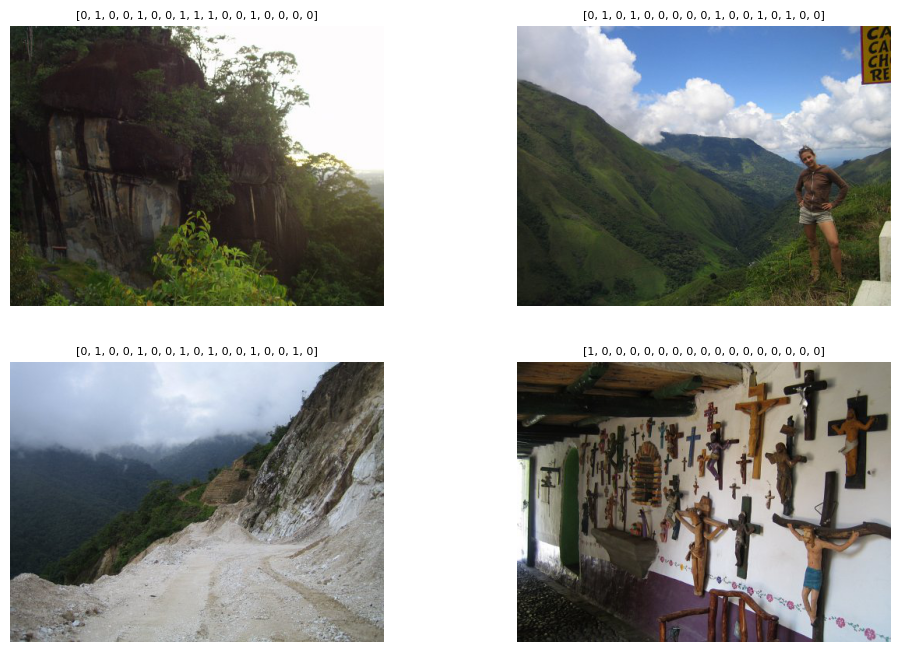

In [1052]:
nobs = 4 
ncols = 2
nrows = nobs//ncols

style.use("default")
plt.figure(figsize=(12,4*nrows))
for i in range(4):
    ax = plt.subplot(nrows, ncols, i+1)
    plt.imshow(Image.open(train_df['file_name'][i]))
    plt.title(train_df['classes'][i], size=8)
    plt.axis('off')

### Data Argumentation

Add here later

In [1053]:
CHANNELS = 3
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 16 
from sklearn.utils import resample

In [1054]:
class_weights = {}
weights =list()

In [1055]:
index = 0
train_size = len(train_df)

for column in train_df:
    if train_df[column].name != 'file_name' and train_df[column].name != 'classes':
        class_weights[index] = len(train_df[train_df[column] == 1]) / train_size
        weights.append(len(train_df[train_df[column] == 1]) / train_size)
        index += 1

In [1056]:
from sklearn.utils import resample


night = train_df[train_df.night == 1]
not_night = train_df[train_df.night == 0]

oversample = resample(night, 
                       replace=True, 
                       n_samples=len(not_night))
                      
train_df = pd.concat([not_night, oversample])

beach = train_df[train_df.beach == 1]
not_beach = train_df[train_df.beach == 0]
                      
oversample = resample(beach, 
                       replace=True, 
                       n_samples=len(not_beach))
                      
train_df = pd.concat([not_beach, oversample])


animal = train_df[train_df.animal == 1]
not_animal = train_df[train_df.animal == 0]
                      
oversample = resample(animal, 
                       replace=True, 
                       n_samples=len(not_animal))
                      
train_df = pd.concat([not_animal, oversample])

indoor = train_df[train_df.indoor == 1]
not_indoor = train_df[train_df.indoor == 0]

oversample = resample(indoor, 
                       replace=True, 
                       n_samples=len(not_indoor))
                      
train_df = pd.concat([not_indoor, oversample])
                      
road = train_df[train_df.road == 1]
not_road = train_df[train_df.road == 0]

oversample = resample(road, 
                       replace=True, 
                       n_samples=len(not_road))
                      
train_df = pd.concat([not_road, oversample])

In [1349]:
outdoor = train_df[train_df.outdoor == 1]
not_outdoor = train_df[train_df.outdoor == 0]

undersample = resample(not_outdoor, 
                       replace=True, 
                       n_samples=len(outdoor))
                      
train_df = pd.concat([outdoor, undersample])

day = train_df[train_df.day == 1]
not_day = train_df[train_df.day == 0]

undersample = resample(not_day, 
                       replace=True, 
                       n_samples=len(day))
                      
train_df = pd.concat([day, undersample])

sky = train_df[train_df.sky == 1]
not_sky = train_df[train_df.sky == 0]

undersample = resample(not_sky, 
                       replace=True, 
                       n_samples=len(sky))
                      
train_df = pd.concat([sky, undersample])

# person = train_df[train_df.person == 1]
# not_person = train_df[train_df.person == 0]

# undersample = resample(not_person, 
#                        replace=True, 
#                        n_samples=len(person))
                      
# train_df = pd.concat([person, undersample])

In [1155]:
person = train_df[train_df.person == 1]
not_person = train_df[train_df.person == 0]

undersample = resample(not_person, 
                       replace=True, 
                       n_samples=len(person))
                      
train_df = pd.concat([person, undersample])


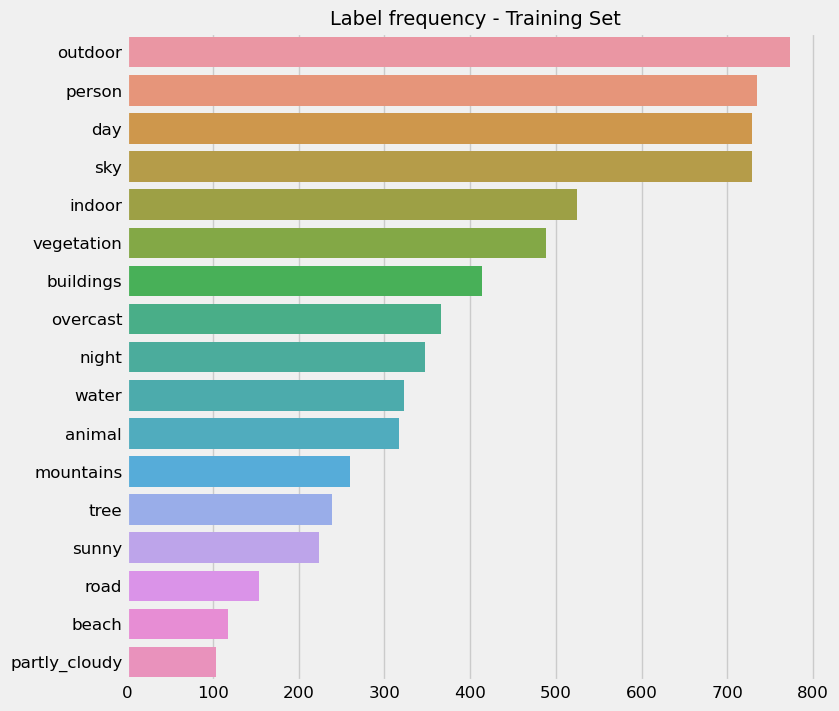

In [1252]:
plot()

In [1253]:
train_df

,file_name,indoor,outdoor,person,day,night,water,road,vegetation,tree,mountains,beach,buildings,sky,sunny,partly_cloudy,overcast,animal,classes
1,/home/lucas/Documents/ML_FinalProject/train/tr...,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,"[0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, ..."
4,/home/lucas/Documents/ML_FinalProject/train/tr...,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,"[0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, ..."
8,/home/lucas/Documents/ML_FinalProject/train/tr...,0,1,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,"[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, ..."
15,/home/lucas/Documents/ML_FinalProject/train/tr...,0,1,1,1,0,0,1,1,0,1,0,0,1,1,0,0,0,"[0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, ..."
16,/home/lucas/Documents/ML_FinalProject/train/tr...,0,1,1,1,0,0,1,1,0,1,0,0,1,1,0,0,0,"[0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1798,/home/lucas/Documents/ML_FinalProject/train/tr...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1703,/home/lucas/Documents/ML_FinalProject/train/tr...,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1334,/home/lucas/Documents/ML_FinalProject/train/tr...,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,"[1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
843,/home/lucas/Documents/ML_FinalProject/train/tr...,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,"[0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."


In [1060]:
indexes  = train_df[(train_df.outdoor ==1) & 
                    (train_df.sunny ==0) & 
                    (train_df.partly_cloudy ==0) & 
                    (train_df.overcast ==0) &
                   (train_df.night ==0) &
                   (train_df.beach ==0) & 
                   (train_df.water ==0)].index

In [1061]:
train_df.drop(indexes , inplace=True)

In [1062]:
indexes  = train_df[(train_df.day ==1) & 
                    (train_df.sunny ==0) & 
                    (train_df.partly_cloudy ==0) & 
                    (train_df.overcast ==0) &
                   (train_df.night ==0) &
                   (train_df.beach ==0) & 
                   (train_df.water ==0)].index

train_df.drop(indexes , inplace=True)

In [1063]:
indexes  = train_df[(train_df.sky ==1) & 
                    (train_df.sunny ==0) & 
                    (train_df.partly_cloudy ==0) & 
                    (train_df.overcast ==0) &
                   (train_df.night ==0) &
                   (train_df.beach ==0) & 
                   (train_df.water ==0)].index

train_df.drop(indexes , inplace=True)

In [1064]:
indexes  = train_df[(train_df.person ==1) & 
                    (train_df.sunny ==0) & 
                    (train_df.partly_cloudy ==0) & 
                    (train_df.overcast ==0) &
                   (train_df.night ==0) &
                   (train_df.beach ==0) & 
                   (train_df.water ==0)].index

train_df.drop(indexes , inplace=True)

In [1065]:
indexes  = train_df[(train_df.outdoor ==1) & 
                    (train_df.day ==0)].index

train_df.drop(indexes , inplace=True)

In [1066]:
indexes  = train_df[(train_df.day ==1) & 
                    (train_df.sky ==0)].index
train_df.drop(indexes , inplace=True)

In [1067]:
indexes  = train_df[(train_df.day ==1) & 
                    (train_df.road ==0)].index
train_df.drop(indexes , inplace=True)

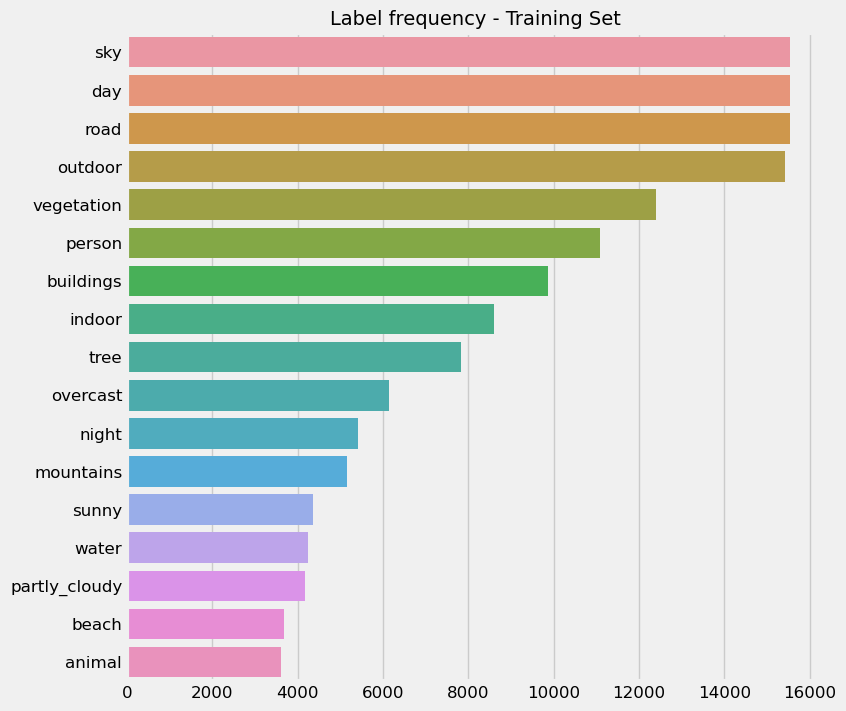

In [1068]:
plot()

In [1069]:
indexes  = train_df[(train_df.outdoor ==1) & 
                    (train_df.vegetation ==0)].index
train_df.drop(indexes , inplace=True)

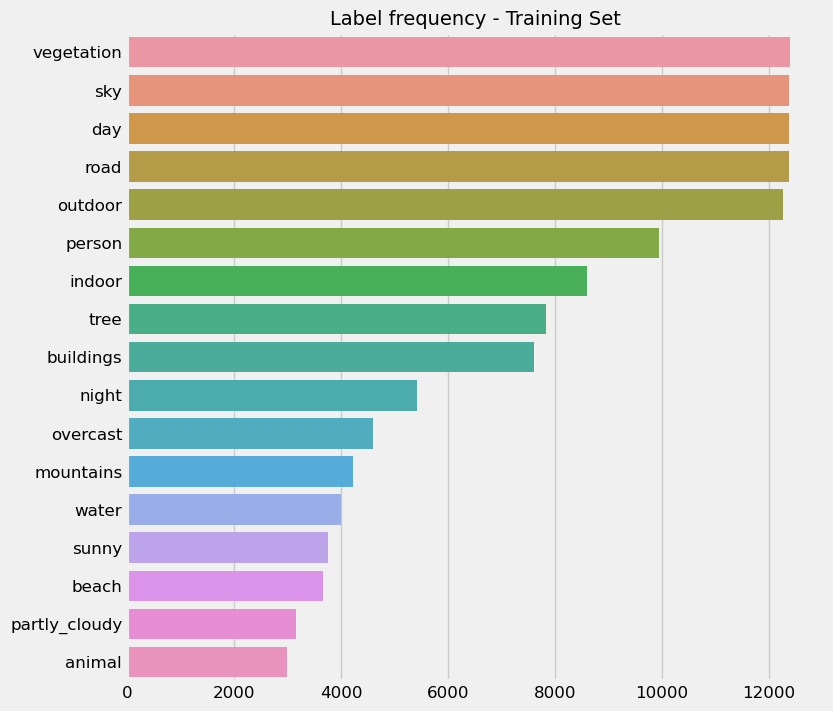

In [1070]:
plot()

In [1071]:
bk = train_df.copy()

In [1098]:
train_df = bk.copy()

In [1099]:
indexes  = train_df[(train_df.outdoor ==1) & 
                    (train_df.beach ==0) & (train_df.partly_cloudy ==0)].index
train_df.drop(indexes , inplace=True)
##maybe not

In [1100]:
indexes  = train_df[(train_df.sky ==1) & 
                    (train_df.overcast ==0) & (train_df.mountains ==0) & (train_df.sunny ==0)  & (train_df.partly_cloudy ==0)].index
train_df.drop(indexes , inplace=True)
##maybe not

In [1101]:
indexes  = train_df[(train_df.indoor ==1) & 
                    (train_df.night ==0) & (train_df.overcast ==0) & (train_df.sunny ==0) & (train_df.animal ==0)  & (train_df.buildings ==0)].index
train_df.drop(indexes , inplace=True)

In [1103]:
train_df

,file_name,indoor,outdoor,person,day,night,water,road,vegetation,tree,mountains,beach,buildings,sky,sunny,partly_cloudy,overcast,animal,classes
1422,/home/lucas/Documents/ML_FinalProject/train/tr...,0,1,1,1,0,1,1,1,1,1,1,1,1,0,0,0,0,"[0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, ..."
775,/home/lucas/Documents/ML_FinalProject/train/tr...,0,1,1,1,0,0,1,1,1,0,0,1,1,0,1,0,0,"[0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, ..."
1260,/home/lucas/Documents/ML_FinalProject/train/tr...,0,1,1,1,0,0,1,1,1,0,0,0,1,0,1,0,0,"[0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, ..."
894,/home/lucas/Documents/ML_FinalProject/train/tr...,0,1,1,1,0,0,1,1,1,0,0,1,1,0,1,0,0,"[0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, ..."
1422,/home/lucas/Documents/ML_FinalProject/train/tr...,0,1,1,1,0,1,1,1,1,1,1,1,1,0,0,0,0,"[0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,/home/lucas/Documents/ML_FinalProject/train/tr...,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,"[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
430,/home/lucas/Documents/ML_FinalProject/train/tr...,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,"[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
543,/home/lucas/Documents/ML_FinalProject/train/tr...,0,1,0,1,0,1,1,1,0,0,1,0,1,1,0,0,0,"[0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, ..."
1089,/home/lucas/Documents/ML_FinalProject/train/tr...,0,1,0,1,0,0,1,1,0,1,0,1,1,0,1,0,0,"[0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, ..."


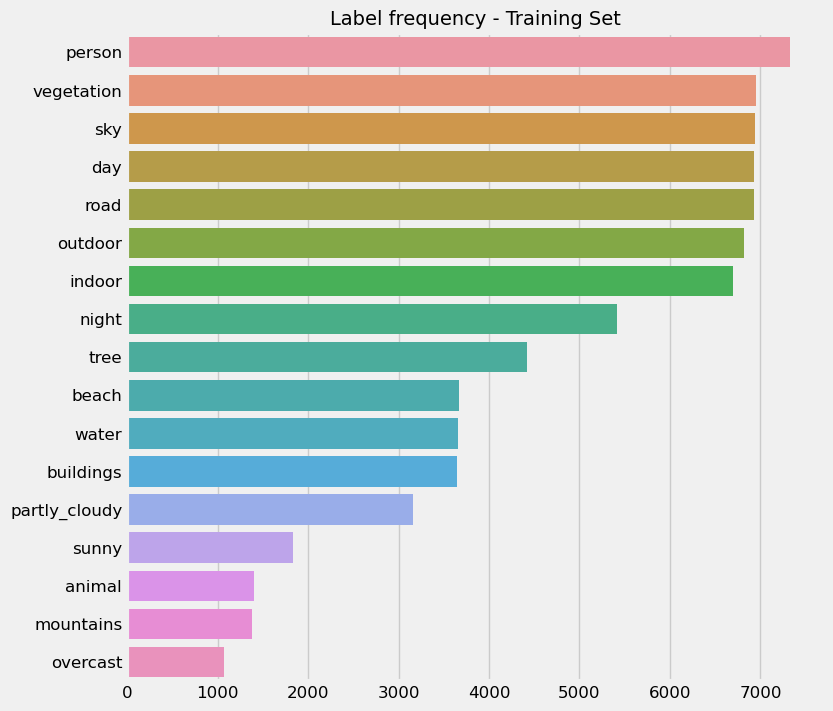

In [1102]:
plot()

### Dataset Generators

Easy way 

In [11]:
train_df, val_df = train_test_split(train_df, test_size=0.1)

train = ImageDataGenerator(rescale=1./255,
                               rotation_range=45,
                               shear_range=0.2,
                               zoom_range=0.4,
                               horizontal_flip=True,
                               vertical_flip=True)

val = ImageDataGenerator(rescale=1./255)

train = ImageDataGenerator(rescale=1./255,
                               rotation_range=30,
                               zoom_range=0.4,
                               horizontal_flip=True)

val = ImageDataGenerator(rescale=1./255)



train_data_gen = train.flow_from_dataframe(dataframe=train_df,
                                               batch_size=BATCH_SIZE,
                                               directory=train_pics_dir,
                                               x_col='file_name',
                                               y_col=train_df.columns[1:18].tolist(),
                                               shuffle=True, seed=42,
                                               class_mode="raw",
                                               classes=labels[1:].tolist(),
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

val_data_gen = val.flow_from_dataframe(dataframe=val_df,
                                             batch_size=BATCH_SIZE,
                                             directory=train_pics_dir,
                                             x_col='file_name',
                                             y_col=train_df.columns[1:18].tolist(),
                                             shuffle=False, seed=42,
                                             class_mode='raw',
                                             classes=labels[1:].tolist(),
                                             target_size=(IMG_HEIGHT, IMG_WIDTH))

# ## We don't want test set to be suffle or have more than one batch size, it need to be almost untouch 
test_datagen=ImageDataGenerator(rescale=1./255.)
test_generator=test_datagen.flow_from_dataframe(dataframe=test_df,
                                                directory=test_pics_dir,
                                                x_col='file_name',
                                                y_col=None,
                                                batch_size=1,
                                                shuffle=False,
                                                class_mode=None,
                                                target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 1641 validated image filenames.
Found 183 validated image filenames.
Found 1000 validated image filenames.


/home/lucas/.local/lib/python3.8/site-packages/keras_preprocessing/image/dataframe_iterator.py:219: UserWarning: `classes` will be ignored given the class_mode="raw"
  warnings.warn('`classes` will be ignored given the class_mode="{}"'


[0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0]


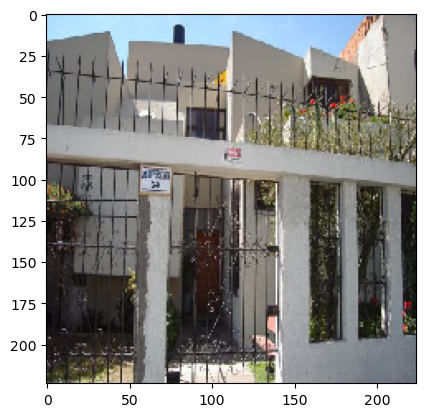

In [12]:
for i, l in val_data_gen:
    plt. imshow(i[1])
    print(l[1])
    break

### Model 

- Very simple one, needs to improve

In [1305]:
from tensorflow.keras.applications import EfficientNetB2, MobileNetV2, ResNet50

In [1310]:
effic_b2 = EfficientNetB2(weights=None, include_top=True, classes=17, drop_connect_rate=0.2, pooling='avg', input_shape=(IMG_WIDTH, IMG_HEIGHT, CHANNELS))


In [1309]:
effic_b2.summary()

Model: "efficientnetb2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling_1 (Rescaling)         (None, 224, 224, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
normalization_1 (Normalization) (None, 224, 224, 3)  7           rescaling_1[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization_1[0][0]            
_____________________________________________________________________________________

In [49]:
v2 = MobileNetV2(weights='imagenet', include_top=False,classes=17, pooling='avg', input_shape=(IMG_WIDTH, IMG_HEIGHT, CHANNELS))


In [25]:
res50 = ResNet50(weights=None ,pooling='avg', include_top=False, input_shape=(IMG_WIDTH, IMG_HEIGHT, CHANNELS))

In [34]:
effic_b2.summary()

Model: "efficientnetb2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 224, 224, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 224, 224, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization[0][0]              
_____________________________________________________________________________________

In [288]:
model = Sequential()
model.add(layers.convolutional.Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(IMG_WIDTH, IMG_HEIGHT, CHANNELS)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.core.Dropout(0.25))
model.add(layers.convolutional.Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.core.Dropout(0.25))
model.add(layers.convolutional.Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(layers.convolutional.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.core.Dropout(0.25))
model.add(layers.convolutional.Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.core.Dropout(0.25))
model.add(layers.core.Flatten())
model.add(layers.core.Dense(128, activation='relu'))
model.add(layers.core.Dropout(0.5))
model.add(layers.core.Dense(64, activation='relu'))
model.add(layers.core.Dropout(0.5))
model.add(layers.core.Dense(17, activation='sigmoid'))

In [56]:
model = Sequential()
model.add(effic_b2)
model.add(layers.core.Dense(17, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb2 (Functional)  (None, 1408)              7768569   
_________________________________________________________________
dense_4 (Dense)              (None, 17)                23953     
Total params: 7,792,522
Trainable params: 7,724,947
Non-trainable params: 67,575
_________________________________________________________________


In [57]:
#opt = optimizers.SGD(lr=1e-5, momentum=0.9)
#model.compile(optimizers.Adam(lr=1e-5),loss="categorical_crossentropy",metrics=["accuracy"])
#model.compile(optimizer=opt,loss = 'categorical_crossentropy', metrics = ['accuracy'])
#model.compile(optimizers.Adam(lr=1e-5),loss="categorical_crossentropy",metrics=["accuracy"])
model.compile(optimizer='adam',loss="binary_crossentropy",metrics=["accuracy"])

In [58]:
earlystop_callback = EarlyStopping(
  monitor='val_loss', mode='auto', min_delta=0.0001,
  patience=5)

rlr = ReduceLROnPlateau(monitor='val_loss', 
                        factor=0.5, 
                        patience=3, 
                        verbose=1,
                        mode='auto', 
                        min_delta=0.0001)

In [59]:
with tf.device('/gpu:0'):
    model_trained = model.fit(
            train_data_gen,
        steps_per_epoch=train_data_gen.n//train_data_gen.batch_size,
            epochs = 30,
            callbacks=[earlystop_callback, rlr],
            validation_data=val_data_gen,
        validation_steps=val_data_gen.n//val_data_gen.batch_size
    )

Epoch 1/30
92/92 [==============================] - 35s 381ms/step - loss: 0.4410 - accuracy: 0.6610 - val_loss: 0.7589 - val_accuracy: 0.0750
Epoch 2/30
92/92 [==============================] - 34s 365ms/step - loss: 0.4136 - accuracy: 0.7966 - val_loss: 0.4638 - val_accuracy: 0.5312
Epoch 3/30
92/92 [==============================] - 34s 372ms/step - loss: 0.4066 - accuracy: 0.8164 - val_loss: 0.3981 - val_accuracy: 0.8250
Epoch 4/30
92/92 [==============================] - 36s 390ms/step - loss: 0.3994 - accuracy: 0.7945 - val_loss: 0.3943 - val_accuracy: 0.8438
Epoch 5/30
92/92 [==============================] - 34s 370ms/step - loss: 0.3918 - accuracy: 0.7801 - val_loss: 0.3796 - val_accuracy: 0.7375
Epoch 6/30
92/92 [==============================] - 35s 381ms/step - loss: 0.3781 - accuracy: 0.8151 - val_loss: 0.3726 - val_accuracy: 0.7437
Epoch 7/30
92/92 [==============================] - 35s 380ms/step - loss: 0.3735 - accuracy: 0.8055 - val_loss: 0.3908 - val_accuracy: 0.8125

In [60]:
model_trained.model.save('model.h5')

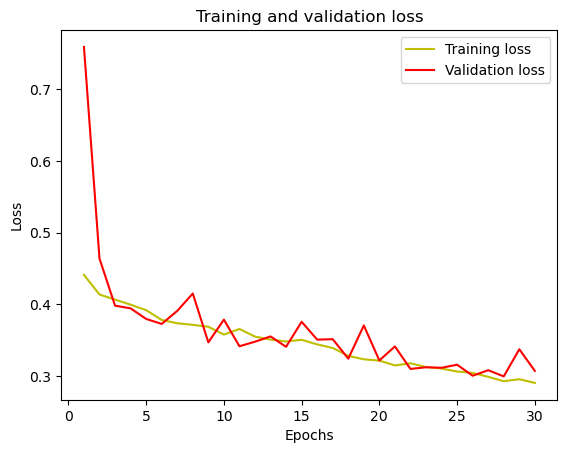

<function matplotlib.pyplot.savefig(*args, **kwargs)>

In [61]:
#plot the training and validation accuracy and loss at each epoch
loss = model_trained.history['loss']
val_loss = model_trained.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.savefig

In [62]:
test_generator.reset()
out = (model_trained.model.predict(test_generator) > 0.5).astype("int32")

In [63]:
df_out = pd.DataFrame(data=out, columns=labels[1:].to_list())
df_out['file_name'] = test_df['file_name']

In [64]:
df_out

,indoor,outdoor,person,day,night,water,road,vegetation,tree,mountains,beach,buildings,sky,sunny,partly_cloudy,overcast,animal,file_name
0,0,1,1,1,0,0,1,1,0,0,0,1,1,0,0,1,0,/home/lucas/Documents/ML_FinalProject/test/tes...
1,0,1,0,1,0,0,0,1,0,1,0,1,1,0,0,1,0,/home/lucas/Documents/ML_FinalProject/test/tes...
2,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,/home/lucas/Documents/ML_FinalProject/test/tes...
3,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,/home/lucas/Documents/ML_FinalProject/test/tes...
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,/home/lucas/Documents/ML_FinalProject/test/tes...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,/home/lucas/Documents/ML_FinalProject/test/tes...
996,0,1,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,/home/lucas/Documents/ML_FinalProject/test/tes...
997,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,/home/lucas/Documents/ML_FinalProject/test/tes...
998,0,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,/home/lucas/Documents/ML_FinalProject/test/tes...


In [359]:
df_out.to_csv('./test/test.eval.txt', index=None, sep=' ')